### Perturbation analysis
    the 𝑤_𝑑𝑖𝑓𝑓 and ℎ_𝑑𝑖𝑓𝑓 scores for the six networks.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

In [2]:
def plot_w(k_value,data_diff,net,arr,y_label):
    sValue = [40] * len(k_value)
    cValue = ['b'] * len(k_value)
    if net == 'celegans':
        sValue[-1] = 200
        cValue[-1] = 'r'
        title_value = 'C.elegans'
    elif net == 'celegansneural':
        sValue[5] = 200
        cValue[5] = 'r'
        title_value = 'Neural network'
    elif net == 'netscience':
        sValue[2] = 200
        cValue[2] = 'r'
        title_value = 'Netscience'
    elif net == 'ploblogs':
        sValue[9] = 200
        cValue[9] = 'r'
        title_value = 'P.blogs'
    elif net == "ussocial":
        sValue[3] = 200
        cValue[3] = 'r'
        title_value = 'UC social'
    elif net == 'wiki':
        sValue[11] = 200
        cValue[11] = 'r'
        title_value = 'Wiki'
    print("*"*50+"\t"+net+"\t"+"*"*50)
    plt.scatter(k_value, data_diff.values.tolist(),s=sValue,c=cValue,alpha=0.6)
    plt.plot(k_value, data_diff.values.tolist(),color='blue')
    plt.tight_layout()
    plt.title(title_value,fontsize=20)
    plt.xlabel('k',fontsize=15)
    plt.ylabel(y_label,fontsize=15)
    plt.show()

In [3]:
def perturbationAnalysis(index_dir):
    for path in glob.glob(os.path.join(index_dir, "*.txt")):
        net = os.path.basename(path).split(".")[0]
        df = pd.read_csv(path,sep='\s+')
        k_value = df['k_value'].values.tolist()
        weight_mean_diff = df["weight_mean"] - df['pre_weight_mean']
        entropy_mean_diff = df['weight_entropy_mean'] - df['pre_entropy_mean']
        rmse = df['rmse']
        plot_w(k_value,weight_mean_diff,net,'weight_diff','w_diff')
        plot_w(k_value,entropy_mean_diff,net,'entropy_diff','h_diff')

**************************************************	celegans	**************************************************


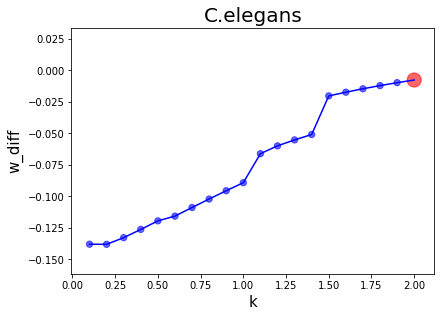

**************************************************	celegans	**************************************************


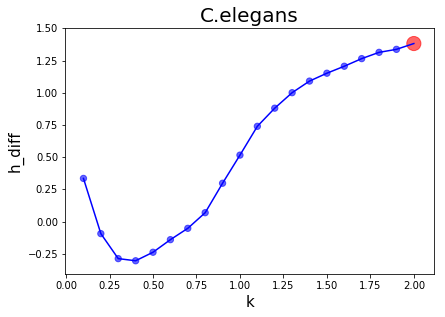

**************************************************	celegansneural	**************************************************


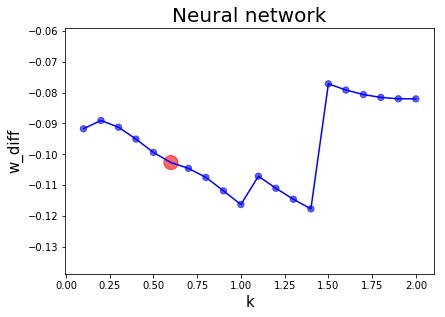

**************************************************	celegansneural	**************************************************


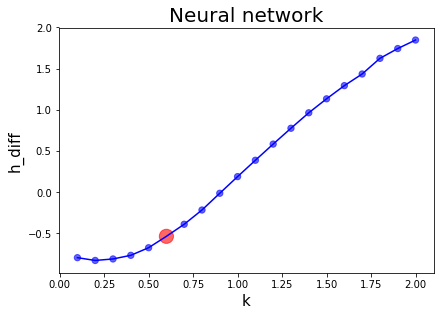

**************************************************	netscience	**************************************************


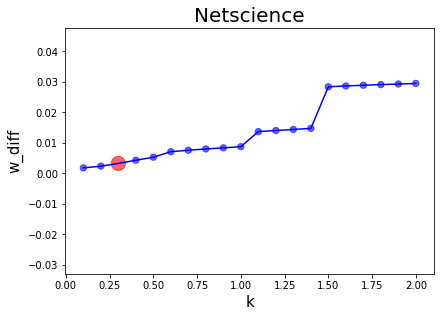

**************************************************	netscience	**************************************************


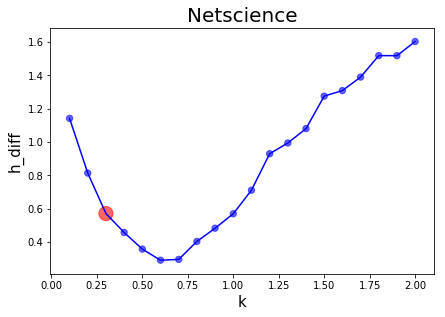

**************************************************	ploblogs	**************************************************


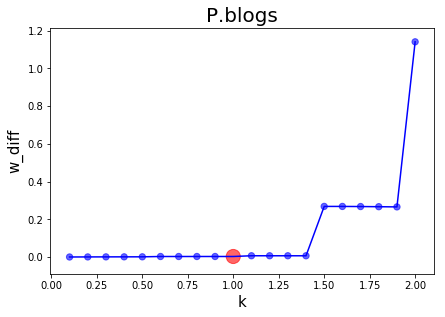

**************************************************	ploblogs	**************************************************


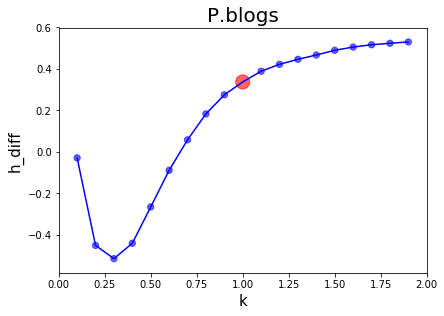

**************************************************	ussocial	**************************************************


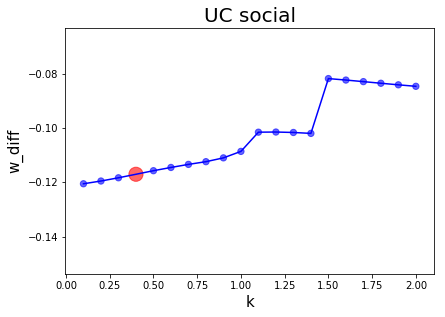

**************************************************	ussocial	**************************************************


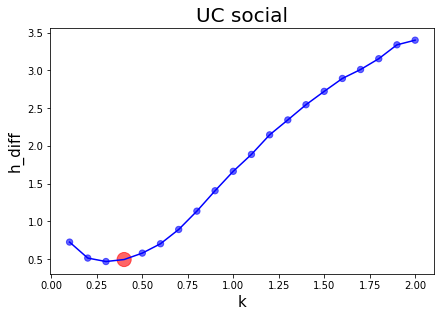

**************************************************	wiki	**************************************************


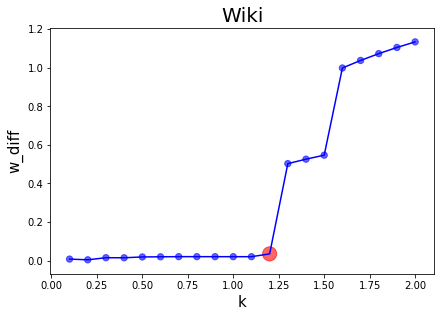

**************************************************	wiki	**************************************************


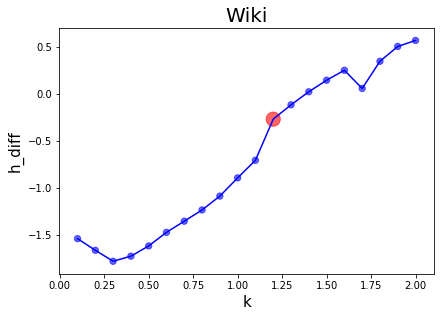

In [4]:
perturbationAnalysis('../data/perturbation_analysis_data')